In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optimization via Gradient Descent

Gradient descent is an iterative optimization algorithm that seeks to minimize a given function by descending along its gradient. At each iteration, the algorithm updates the current point according to the following rule:
$$x_{K}=x_k-\alpha_k \nabla f(x_k)$$
where $x_k$​ is the current point, $\alpha_k$​ is the step size, and $\nabla f(x_k)$ is the gradient of the function at $x_k$.

To decide when to stop the algorithm three criteria have been used:
1. $\| \nabla f(x_k) \| \le tol_f \| \nabla f(x_{0}) \|$
2. $\| x_k -x_{k-1} \| \le tol_x$
3. $k < $ max_it

In [2]:
# 1.1 Gradient descent implementation
def gradient_descent(f, grad_f, x0, lr, maxit, tolf, tolx):
    x = x0
    x_vals = [x0.copy()]
    f_vals = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]
    
    # Stopping criterion 3: ensures a stop when the maximum number of iterations is reached
    for k in range(1, maxit + 1):
        grad = grad_f(x)

        # Stopping criterion 1: ensures a stop when the descent slows down significantly (proximity to an optimal solution)
        if np.linalg.norm(grad) < tolf * grad_norms[0]:
            break

        x_new = x - lr * grad

        # Stopping criterion 2: ensures a stop when the new update is very small
        if np.linalg.norm(x_new - x) < tolx:
            x = x_new
            x_vals.append(x.copy())
            f_vals.append(f(x))
            grad_norms.append(np.linalg.norm(grad_f(x)))
            break

        x = x_new
        x_vals.append(x.copy())
        f_vals.append(f(x))
        grad_norms.append(np.linalg.norm(grad_f(x)))

    return np.array(x_vals), k, np.array(f_vals), np.array(grad_norms)


A major problem of gradient descent is the choice of the step_size, this version of the algorithm will use backtracking procedure to evaluate at each step a good step_size using the Armijo condition for sufficient decrease

In [3]:
# 1.2 Gradient descent with backtracking implementation
def gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx, c=0.5, tau=0.25):
    x = x0
    x_vals = [x0.copy()]
    f_vals = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]

    # Stopping criterion 3: ensures a stop when the maximum number of iterations is reached
    for k in range(1, maxit + 1):
        grad = grad_f(x)

        # Stopping criterion 1: ensures a stop when the descent slows down significantly (proximity to an optimal solution)
        if np.linalg.norm(grad) < tolf * grad_norms[0]:
            break

        # Backtracking with Armijo condition
        t = 1
        while f(x - t * grad) > f(x) - c * t * np.linalg.norm(grad, 2)**2:
            t *= tau

        x_new = x - t * grad

        # Stopping criterion 2: ensures a stop when the new update is very small
        if np.linalg.norm(x_new - x) < tolx:
            x = x_new
            x_vals.append(x.copy())
            f_vals.append(f(x))
            grad_norms.append(np.linalg.norm(grad_f(x)))
            break

        x = x_new
        x_vals.append(x.copy())
        f_vals.append(f(x))
        grad_norms.append(np.linalg.norm(grad_f(x)))

    return np.array(x_vals), k, np.array(f_vals), np.array(grad_norms)

In [4]:
# Some helper functions
def plot_gradient_norms(grads_001, grads_01, grads_05, grads_backtracking, title="Gradient Norms Over Time", label001="Gradient step size=0.01", label01="Gradient step size=0.1", label05="Gradient step size=0.5", label_backtracking="Gradient backtracking"):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(grads_001)), grads_001, label=label001, marker='o', color='blue')
    plt.plot(range(len(grads_01)), grads_01, label=label01, marker='s', color='green')
    plt.plot(range(len(grads_05)), grads_05, label=label05, marker='^', color='red')
    plt.plot(range(len(grads_backtracking)), grads_backtracking, label=label_backtracking, marker='x', color='purple')

    plt.title(title, fontsize=16)
    plt.xlabel("Time Steps", fontsize=14)
    plt.ylabel("Gradient Norm", fontsize=14)
    
    plt.yscale("log")

    plt.legend(loc="best", fontsize=12)
    plt.grid(True, linestyle='--')

    plt.tight_layout()
    plt.show()


def plot_gradient_descent_2d(f, x_vals, title="Gradient Descent Steps"):
    # Define the range for the contour plot
    x_range = np.linspace(min(x[0] for x in x_vals) - 1, max(x[0] for x in x_vals) + 1, 100)
    y_range = np.linspace(min(x[1] for x in x_vals) - 1, max(x[1] for x in x_vals) + 1, 100)
    x, Y = np.meshgrid(x_range, y_range)
    Z = np.array([[f([x, y]) for x in x_range] for y in y_range])

    # Create the contour plot
    plt.figure(figsize=(10, 8))
    contour = plt.contour(x, Y, Z, levels=30, cmap="viridis")
    plt.colorbar(contour, label="f(x, y)")

    # Plot gradient descent steps
    x_steps = [x[0] for x in x_vals]
    y_steps = [x[1] for x in x_vals]
    plt.plot(x_steps, y_steps, marker='o', color='red', label='Steps', zorder=5)

    for i in range(len(x_steps) - 1):
        plt.arrow(x_steps[i], y_steps[i],
                  x_steps[i + 1] - x_steps[i],
                  y_steps[i + 1] - y_steps[i],
                  color='red', head_width=0.1, length_includes_head=True)

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

# 1.3 Testing algorithms
alpha = 0.1
maxit = 100
tolf = 1e-5
tolx = 1e-5


Standard Gradient Descent with step size=0.01:
Last x value: [2.60214133 0.86738044]
Number of iterations: 100
Last function value: 0.17587946605721572
Last gradient norm: 0.8387597178148596


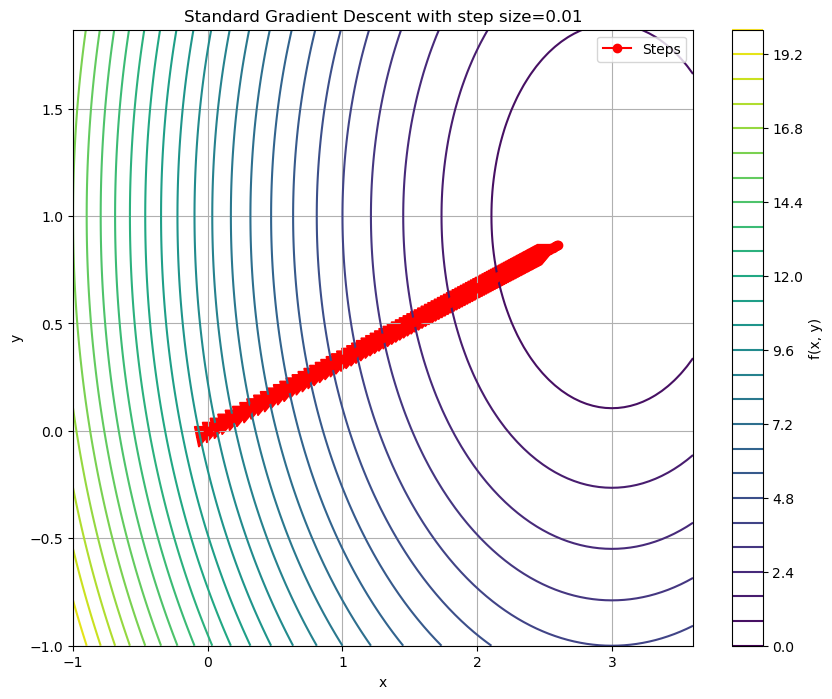

True value difference: 3.1622776601683795
True value difference: 3.0990321069650117
True value difference: 3.0370514648257116
True value difference: 2.9763104355291974
True value difference: 2.9167842268186135
True value difference: 2.858448542282241
True value difference: 2.8012795714365963
True value difference: 2.745253980007864
True value difference: 2.6903489004077072
True value difference: 2.636541922399553
True value difference: 2.5838110839515616
True value difference: 2.5321348622725304
True value difference: 2.48149216502708
True value difference: 2.4318623217265385
True value difference: 2.3832250752920077
True value difference: 2.3355605737861675
True value difference: 2.2888493623104442
True value difference: 2.2430723750642354
True value difference: 2.1982109275629504
True value difference: 2.1542467090116912
True value difference: 2.1111617748314577
True value difference: 2.0689385393348285
True value difference: 2.027559768548132
True value difference: 1.987008573177169

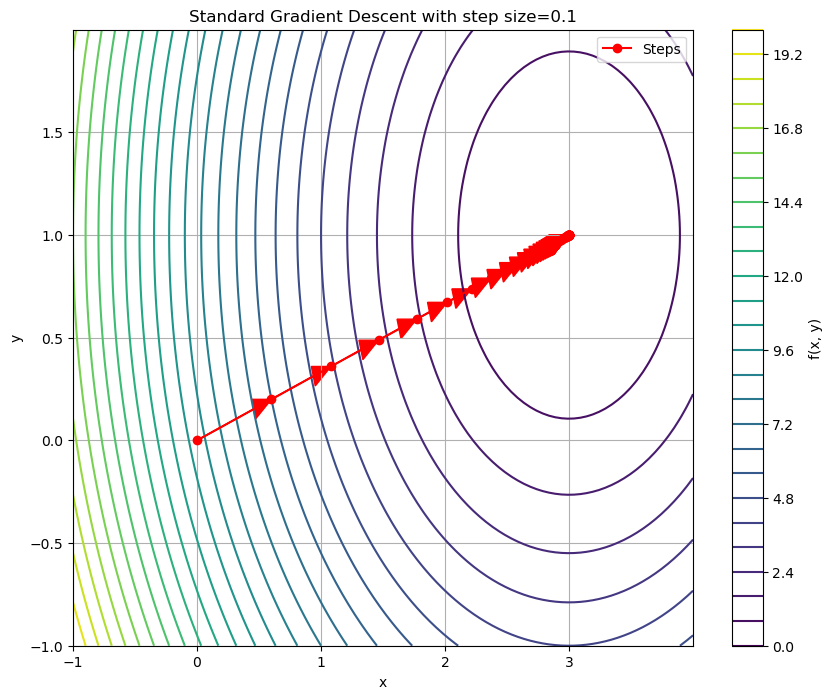

True value difference: 3.1622776601683795
True value difference: 2.5298221281347035
True value difference: 2.0238577025077626
True value difference: 1.6190861620062102
True value difference: 1.2952689296049682
True value difference: 1.0362151436839744
True value difference: 0.8289721149471797
True value difference: 0.6631776919577439
True value difference: 0.5305421535661949
True value difference: 0.424433722852956
True value difference: 0.33954697828236496
True value difference: 0.27163758262589177
True value difference: 0.21731006610071363
True value difference: 0.17384805288057073
True value difference: 0.1390784423044565
True value difference: 0.1112627538435653
True value difference: 0.08901020307485207
True value difference: 0.07120816245988157
True value difference: 0.05696652996790544
True value difference: 0.045573223974324346
True value difference: 0.03645857917945931
True value difference: 0.029166863343567634
True value difference: 0.023333490674853928
True value difference

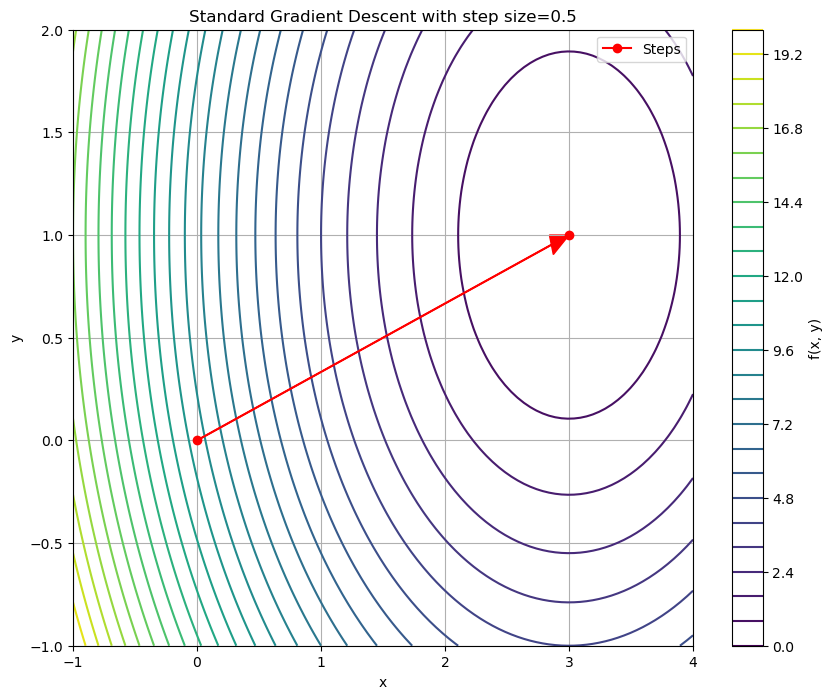

True value difference: 3.1622776601683795
True value difference: 0.0

Gradient Descent with Backtracking:
Last x value: [2.99997711 0.99999237]
Number of iterations: 18
Last function value: 5.820766091346741e-10
Last gradient norm: 4.825252777356536e-05


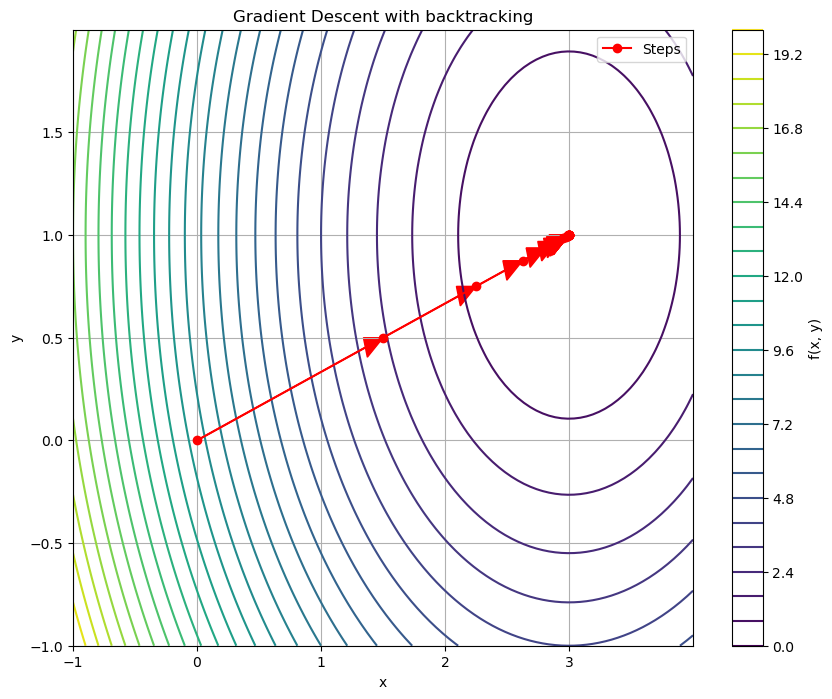

True value difference: 3.1622776601683795
True value difference: 1.5811388300841898
True value difference: 0.7905694150420949
True value difference: 0.39528470752104744
True value difference: 0.19764235376052372
True value difference: 0.09882117688026186
True value difference: 0.04941058844013093
True value difference: 0.024705294220065465
True value difference: 0.012352647110032733
True value difference: 0.006176323555016366
True value difference: 0.003088161777508183
True value difference: 0.0015440808887540916
True value difference: 0.0007720404443770458
True value difference: 0.0003860202221885229
True value difference: 0.00019301011109426145
True value difference: 9.650505554713072e-05
True value difference: 4.825252777356536e-05
True value difference: 2.412626388678268e-05


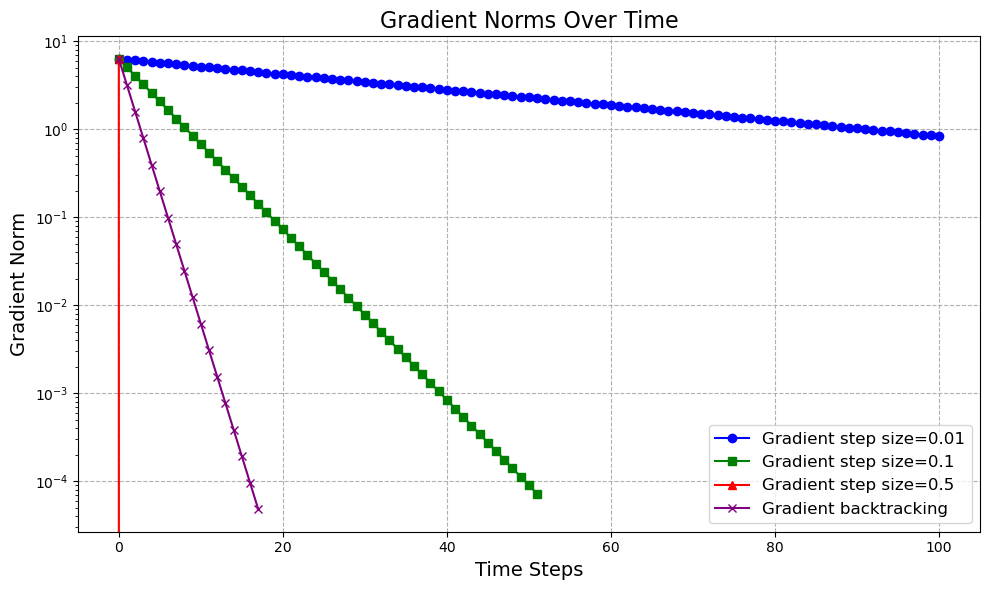

In [5]:
# 1.3.1
f = lambda x: (x[0] - 3)**2 + (x[1] - 1)**2
grad_f = lambda x: np.array([2 * x[0] - 6, 2 * x[1] - 2])
x0 = np.array([0,0])
x_true = np.array([3,1])

gradients = []

for alpha in [0.01, 0.1, 0.5]:
    x_vals, k, f_vals, grad_norms = gradient_descent(f, grad_f, x0, alpha, maxit, tolf, tolx)
    print(f"\nStandard Gradient Descent with step size={alpha}:")
    print("Last x value:", x_vals[-1])
    print("Number of iterations:", k)
    print("Last function value:", f_vals[-1])
    print("Last gradient norm:", grad_norms[-1])
    plot_gradient_descent_2d(f, x_vals, f"Standard Gradient Descent with step size={alpha}")
    
    for x in x_vals:
        print(f"True value difference: {np.linalg.norm(x - x_true)}")
    
    gradients.append(grad_norms)

x_vals_bt, k_bt, f_vals_bt, grad_norms_bt = gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx)
print("\nGradient Descent with Backtracking:")
print("Last x value:", x_vals_bt[-1])
print("Number of iterations:", k_bt)
print("Last function value:", f_vals_bt[-1])
print("Last gradient norm:", grad_norms_bt[-1])
plot_gradient_descent_2d(f, x_vals_bt, f"Gradient Descent with backtracking")

for x in x_vals_bt:
        print(f"True value difference: {np.linalg.norm(x - x_true)}")

plot_gradient_norms(gradients[0], gradients[1], gradients[2], grad_norms_bt)


Standard Gradient Descent with step size=0.01:
Last x value: [1.         1.73476089]
Number of iterations: 100
Last function value: 0.07035178642288611
Last gradient norm: 0.5304782235790122


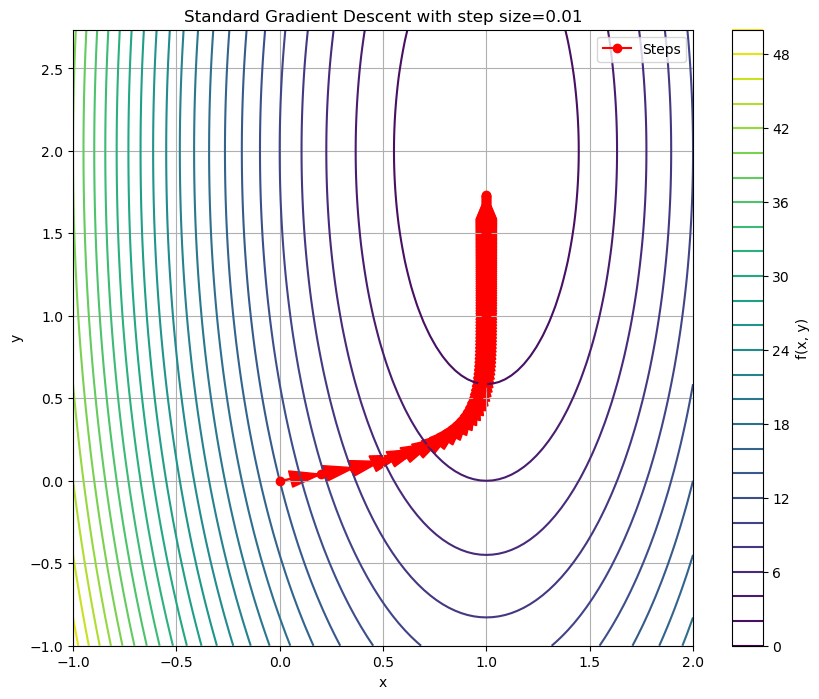

True value difference: 2.23606797749979
True value difference: 2.1169789795838785
True value difference: 2.0246166649516644
True value difference: 1.950772545289686
True value difference: 1.8896624699472502
True value difference: 1.8372983998115786
True value difference: 1.7909735820707127
True value difference: 1.748870558677985
True value difference: 1.7097772896026688
True value difference: 1.6728884367875863
True value difference: 1.6376694117148447
True value difference: 1.6037647838520008
True value difference: 1.5709372083311235
True value difference: 1.5390269832859698
True value difference: 1.5079253910958663
True value difference: 1.477557179119994
True value difference: 1.4478690696899057
True value difference: 1.4188222341613537
True value difference: 1.390387367382387
True value difference: 1.362541465493591
True value difference: 1.335265718350989
True value difference: 1.3085441308605927
True value difference: 1.2823626207873846
True value difference: 1.256708427944287
T

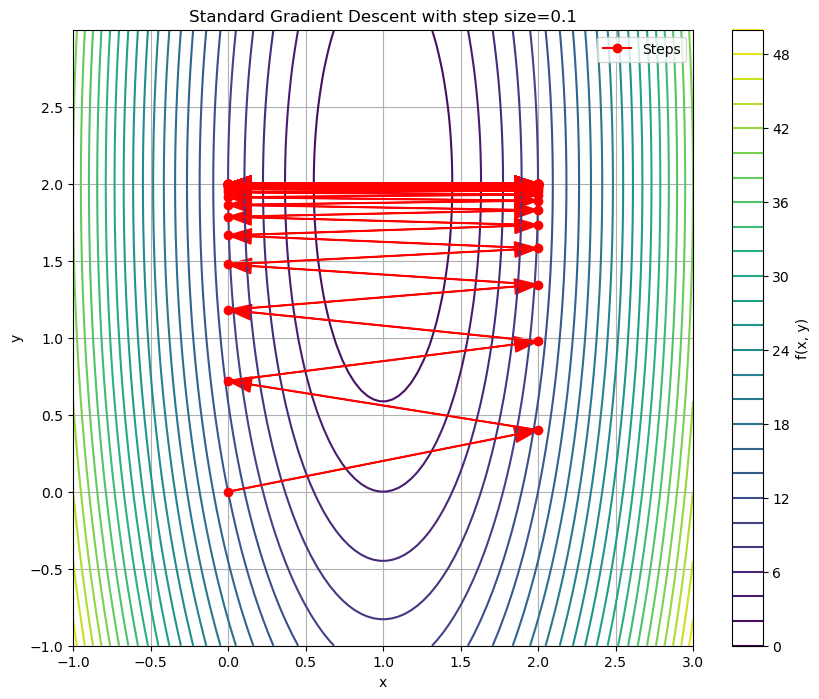

True value difference: 2.23606797749979
True value difference: 1.886796226411321
True value difference: 1.624315240339756
True value difference: 1.4312847375697122
True value difference: 1.292705937172101
True value difference: 1.1956156278670833
True value difference: 1.1291049140553768
True value difference: 1.0843993085778687
True value difference: 1.054793814299393
True value difference: 1.0354021412175696
True value difference: 1.0227985433037505
True value difference: 1.0146500827960028
True value difference: 1.0094005478161179
True value difference: 1.0060264699281756
True value difference: 1.0038611085431757
True value difference: 1.0024728226526352
True value difference: 1.0015833098152997
True value difference: 1.0010136067808295
True value difference: 1.0006488266193259
True value difference: 1.0004152975126708
True value difference: 1.0002658102716067
True value difference: 1.0001701267119114
True value difference: 1.0001088844295052
True value difference: 1.000069687400578

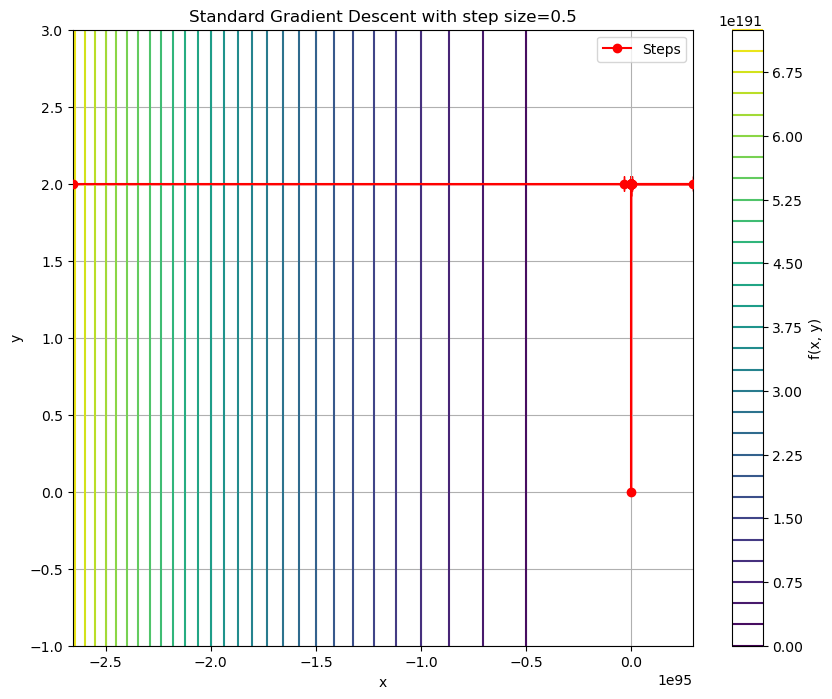

True value difference: 2.23606797749979
True value difference: 9.0
True value difference: 81.0
True value difference: 729.0
True value difference: 6561.0
True value difference: 59049.0
True value difference: 531441.0
True value difference: 4782969.0
True value difference: 43046721.0
True value difference: 387420489.0
True value difference: 3486784401.0
True value difference: 31381059609.0
True value difference: 282429536481.0
True value difference: 2541865828329.0
True value difference: 22876792454961.0
True value difference: 205891132094649.0
True value difference: 1853020188851841.0
True value difference: 1.6677181699666568e+16
True value difference: 1.500946352969991e+17
True value difference: 1.350851717672992e+18
True value difference: 1.2157665459056927e+19
True value difference: 1.0941898913151235e+20
True value difference: 9.847709021836112e+20
True value difference: 8.862938119652501e+21
True value difference: 7.976644307687251e+22
True value difference: 7.178979876918527e+23


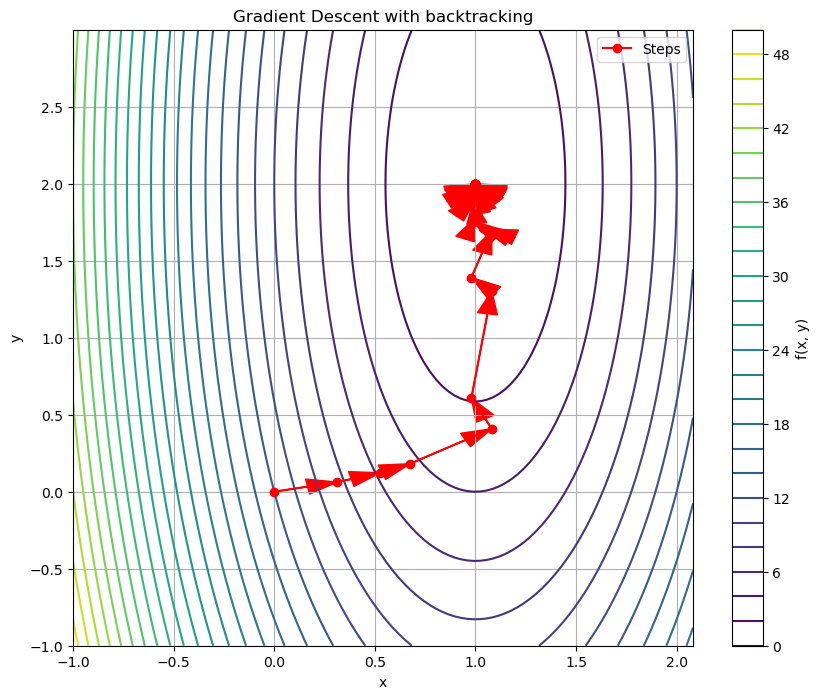

True value difference: 2.23606797749979
True value difference: 2.0558605254248157
True value difference: 1.935550816721516
True value difference: 1.8471064172866363
True value difference: 1.5930837177745678
True value difference: 1.392282802881622
True value difference: 0.7007919173224206
True value difference: 0.6093974380811008
True value difference: 0.3151789491216224
True value difference: 0.30025314474983034
True value difference: 0.288361656055591
True value difference: 0.25025371670531027
True value difference: 0.21882400685873274
True value difference: 0.10982574798880694
True value difference: 0.09575982164060315
True value difference: 0.04881797094342703
True value difference: 0.04683639032668448
True value difference: 0.04060649108075403
True value difference: 0.03550373481796579
True value difference: 0.017827181929898257
True value difference: 0.015537311690034722
True value difference: 0.00793924635553691
True value difference: 0.007608263662752862
True value difference: 

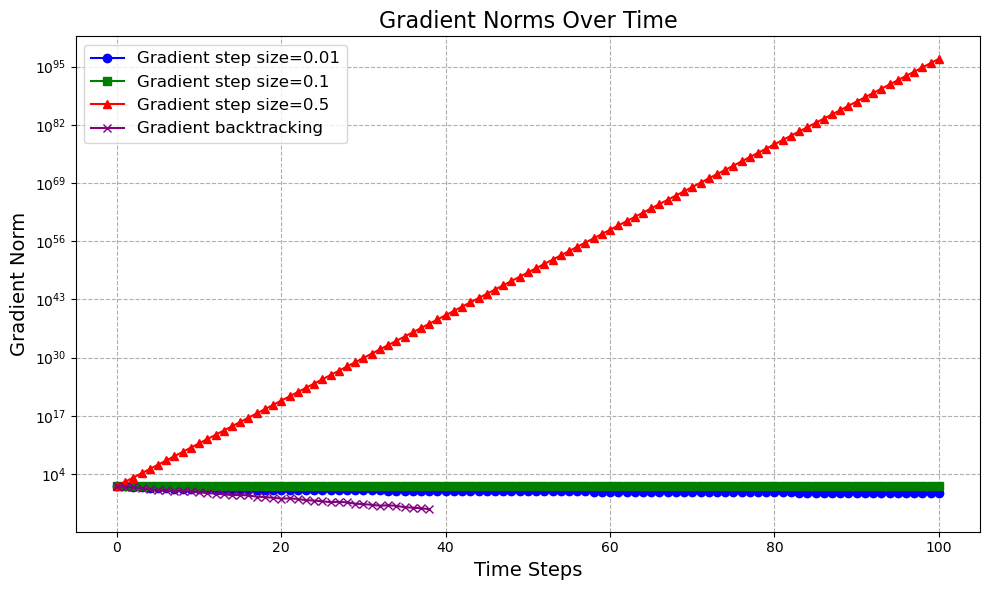

In [6]:
# 1.3.2
f = lambda x: 10*(x[0] - 1)**2 + (x[1] - 2)**2
grad_f = lambda x: np.array([20 * x[0] - 20, 2 * x[1] - 4])
x0 = np.array([0,0])
x_true = np.array([1,2])

gradients = []

for alpha in [0.01, 0.1, 0.5]:
    x_vals, k, f_vals, grad_norms = gradient_descent(f, grad_f, x0, alpha, maxit, tolf, tolx)
    print(f"\nStandard Gradient Descent with step size={alpha}:")
    print("Last x value:", x_vals[-1])
    print("Number of iterations:", k)
    print("Last function value:", f_vals[-1])
    print("Last gradient norm:", grad_norms[-1])
    plot_gradient_descent_2d(f, x_vals, f"Standard Gradient Descent with step size={alpha}")
    
    for x in x_vals:
        print(f"True value difference: {np.linalg.norm(x - x_true)}")
    
    gradients.append(grad_norms)

x_vals_bt, k_bt, f_vals_bt, grad_norms_bt = gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx)
print("\nGradient Descent with Backtracking:")
print("Last x value:", x_vals_bt[-1])
print("Number of iterations:", k_bt)
print("Last function value:", f_vals_bt[-1])
print("Last gradient norm:", grad_norms_bt[-1])
plot_gradient_descent_2d(f, x_vals_bt, f"Gradient Descent with backtracking")

for x in x_vals_bt:
        print(f"True value difference: {np.linalg.norm(x - x_true)}")

plot_gradient_norms(gradients[0], gradients[1], gradients[2], grad_norms_bt)

Standard Gradient Descent:
Last x value: [1.08344022 1.04346111 0.96730598 0.91333192 0.87494211]
Number of iterations: 100
Last function value: 0.01777488029741753
Last gradient norm: 0.23015960421065704
True value difference: 2.23606797749979
True value difference: 2.054057989813073
True value difference: 1.889255570809658
True value difference: 1.7401544180278858
True value difference: 1.6053780879592752
True value difference: 1.4836673448869397
True value difference: 1.3738686080373095
True value difference: 1.2749234493153072
True value difference: 1.185859110729688
True value difference: 1.105780022996847
True value difference: 1.0338603126578017
True value difference: 0.9693372825661716
True value difference: 0.9115058389001184
True value difference: 0.8597138174784426
True value difference: 0.8133581355009374
True value difference: 0.7718816660010914
True value difference: 0.7347707065076187
True value difference: 0.7015528958646766
True value difference: 0.6717954277842432
Tru

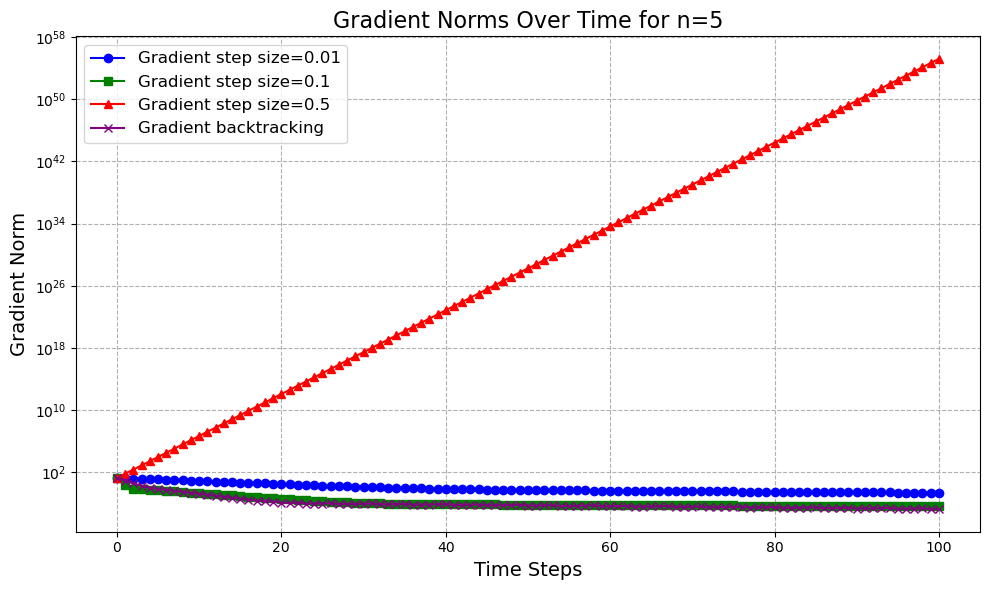

Standard Gradient Descent:
Last x value: [0.95698506 1.07659429 1.07279626 1.04873318 1.02114135 0.99470322
 0.97074569 0.9495058  0.93084711 0.91451521]
Number of iterations: 100
Last function value: 0.007557658096677542
Last gradient norm: 0.09904729342724322
True value difference: 3.1622776601683795
True value difference: 2.6025897019506683
True value difference: 2.1658883705854817
True value difference: 1.826853631953776
True value difference: 1.564847654579917
True value difference: 1.362963079583049
True value difference: 1.2073632885650698
True value difference: 1.0868380848881243
True value difference: 0.9924769918972574
True value difference: 0.9173745345017494
True value difference: 0.8563238329739401
True value difference: 0.8054988374948122
True value difference: 0.7621486599518692
True value difference: 0.7243278781500646
True value difference: 0.6906757349236944
True value difference: 0.660245662683845
True value difference: 0.6323793065838571
True value difference: 0.606

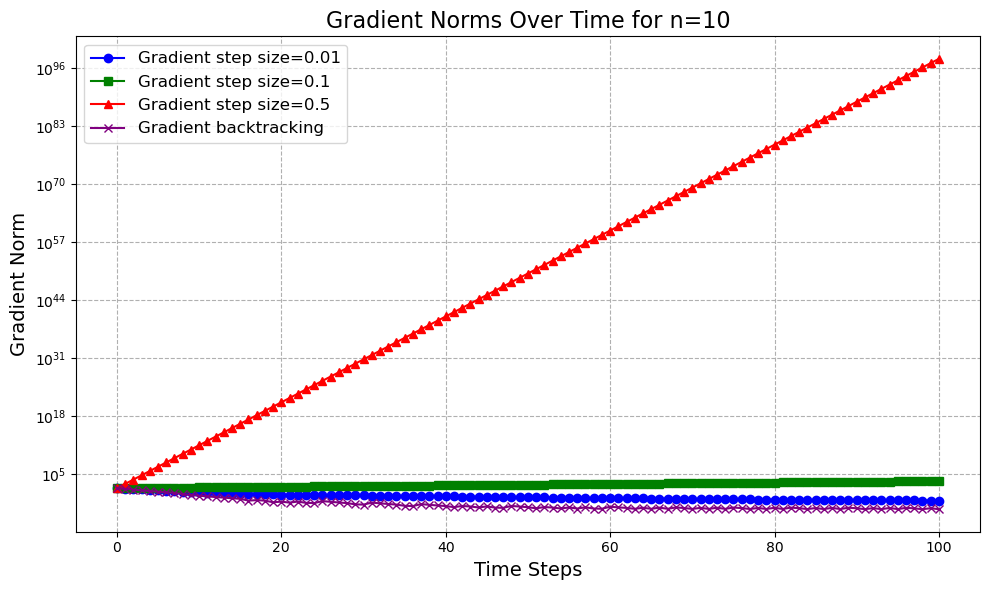

Standard Gradient Descent:
Last x value: [0.95972396 1.0230104  1.05018763 1.05472614 1.04860345 1.0375174
 1.02429483 1.01039344 0.99657981 0.98325481 0.97061892 0.9587603
 0.94770352 0.93743727 0.9279305 ]
Number of iterations: 100
Last function value: 0.011311515249849953
Last gradient norm: 0.1581359160816315
True value difference: 3.872983346207417
True value difference: 2.824314815647185
True value difference: 2.1432572439770796
True value difference: 1.704617066580732
True value difference: 1.420244403755205
True value difference: 1.230098897150623
True value difference: 1.0958193500395903
True value difference: 0.9945560948399579
True value difference: 0.9134190916086254
True value difference: 0.8453438237734486
True value difference: 0.786462800595001
True value difference: 0.7345991370944323
True value difference: 0.6884550390370809
True value difference: 0.6471895859844904
True value difference: 0.6102030487123219
True value difference: 0.5770276240209141
True value differen

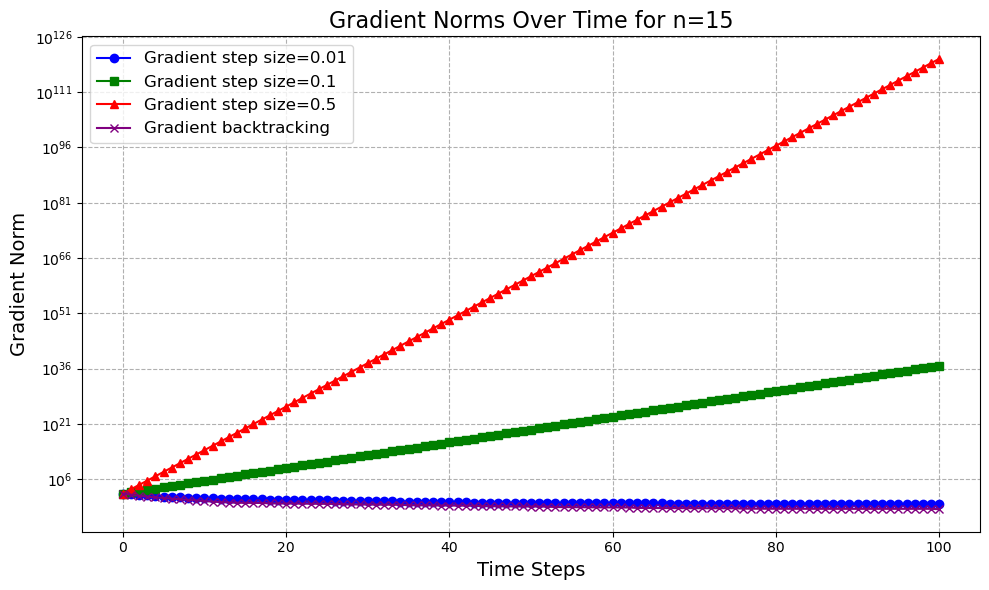

Standard Gradient Descent:
Last x value: [0.98568006 0.9775954  1.01033576 1.03006468 1.03900947 1.04089505
 1.03834756 1.03306556 1.02613951 1.01827501 1.00993285 1.00141576
 0.99292282 0.98458411 0.97648316 0.96867191 0.96118059 0.95402457
 0.94720896 0.94073193]
Number of iterations: 100
Last function value: 0.007724239631672158
Last gradient norm: 0.1583540823879557
True value difference: 4.47213595499958
True value difference: 2.857556086375133
True value difference: 2.0214291213222415
True value difference: 1.5815820722821776
True value difference: 1.3275891559460224
True value difference: 1.1585553080514135
True value difference: 1.0316410576617936
True value difference: 0.9294067500012254
True value difference: 0.8443407989423807
True value difference: 0.7726627879870152
True value difference: 0.7120256384831396
True value difference: 0.6606881601301767
True value difference: 0.61721843433541
True value difference: 0.5803858724223868
True value difference: 0.5491197667456962
Tr

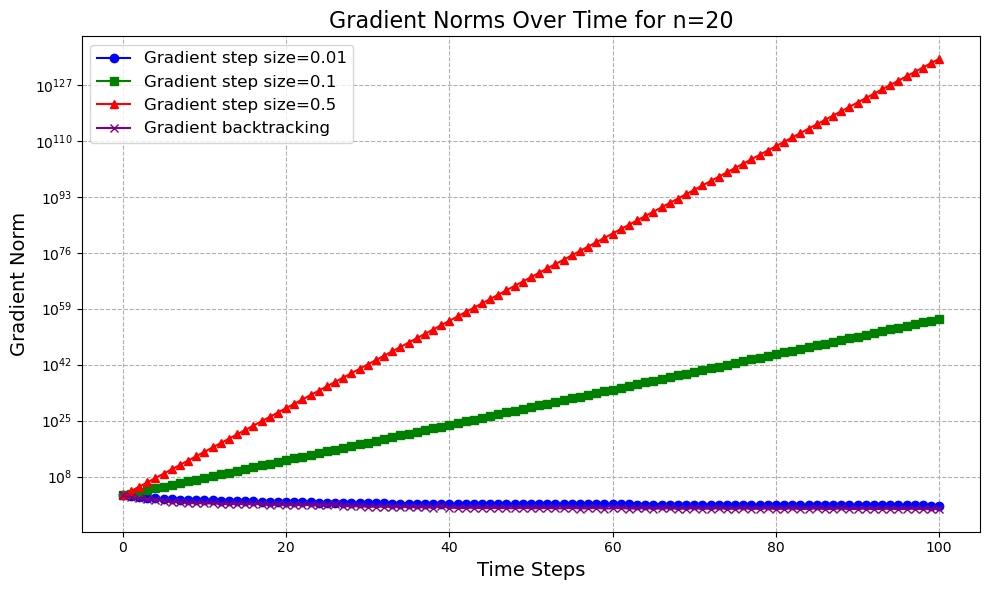

Standard Gradient Descent:
Last x value: [1.00658798 0.95588594 0.98202068 1.00555476 1.02132764 1.03057106
 1.03500069 1.03599989 1.03458456 1.03148465 1.02722355 1.02217808
 1.01662103 1.01075086 1.00471243 0.99861165 0.99252581 0.98651106
 0.98060786 0.97484488 0.96924193 0.96381218 0.95856378 0.95350106
 0.94862551]
Number of iterations: 100
Last function value: 0.005241793547984446
Last gradient norm: 0.11748769504920482
True value difference: 5.0
True value difference: 2.770890092418802
True value difference: 1.8974731633406767
True value difference: 1.5035602892889752
True value difference: 1.2685104129797085
True value difference: 1.0985888864536093
True value difference: 0.9666175081689318
True value difference: 0.8621671666774982
True value difference: 0.7792009670011958
True value difference: 0.7132071508368039
True value difference: 0.6605242068566529
True value difference: 0.6181561042096144
True value difference: 0.5836879624925899
True value difference: 0.555213764130601

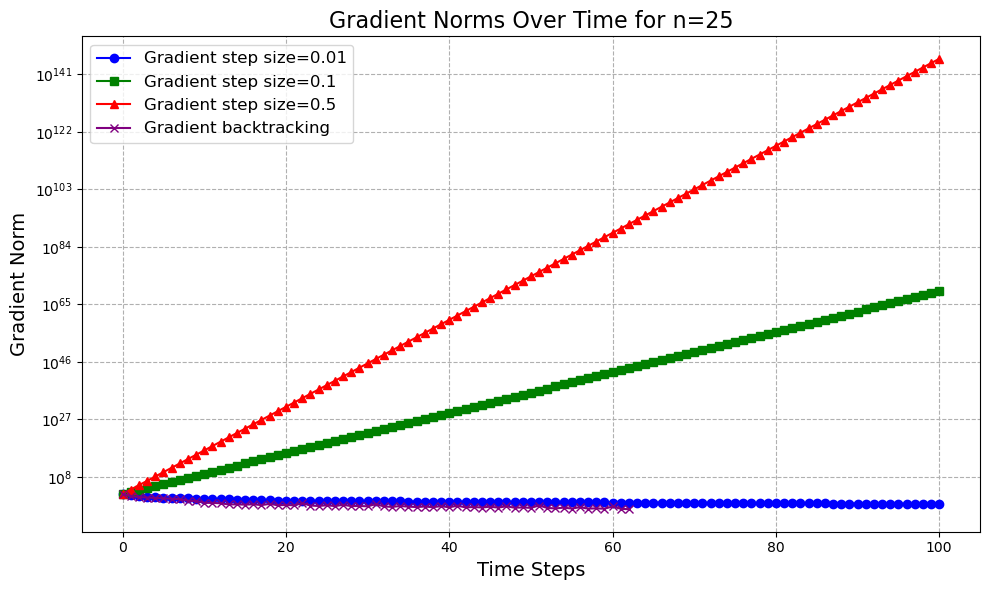

In [7]:
# 1.3.3
for n in [5, 10, 15, 20, 25]:    
    gradients = []
    x_true = np.ones(n)
    
    for alpha in [0.01, 0.1, 0.5]:
        v = np.linspace(0, 1, n)
        A = np.vander(v, increasing=True)

        b = A @ x_true

        f = lambda x: 0.5 * np.linalg.norm(A @ x - b)**2
        grad_f = lambda x: A.T @ (A @ x - b)

        x0 = np.zeros(n)

        x_vals, k, f_vals, grad_norms = gradient_descent(f, grad_f, x0, alpha, maxit, tolf, tolx)
        print("Standard Gradient Descent:")
        print("Last x value:", x_vals[-1])
        print("Number of iterations:", k)
        print("Last function value:", f_vals[-1])
        print("Last gradient norm:", grad_norms[-1])
        
        for x in x_vals:
            print(f"True value difference: {np.linalg.norm(x - x_true)}")
        
        gradients.append(grad_norms)

    x_vals_bt, k_bt, f_vals_bt, grad_norms_bt = gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx)
    print("\nGradient Descent with Backtracking:")
    print("Last x value:", x_vals_bt[-1])
    print("Number of iterations:", k_bt)
    print("Last function value:", f_vals_bt[-1])
    print("Last gradient norm:", grad_norms_bt[-1])
    
    for x in x_vals_bt:
        print(f"True value difference: {np.linalg.norm(x - x_true)}")
    
    plot_gradient_norms(gradients[0], gradients[1], gradients[2], grad_norms_bt, title=f"Gradient Norms Over Time for n={n}")

Standard Gradient Descent:
Last x value: [1.08344022 1.04346111 0.96730598 0.91333192 0.87494211]
Number of iterations: 100
Last function value: 0.01777488029741753
Last gradient norm: 0.23015960421065704
Standard Gradient Descent:
Last x value: [1.0832317  1.04202786 0.96571541 0.91170298 0.87331008]
Number of iterations: 100
Last function value: 0.04221396358955112
Last gradient norm: 0.22783395742622414
Standard Gradient Descent:
Last x value: [1.08115928 1.02932764 0.95166788 0.89733571 0.8589255 ]
Number of iterations: 100
Last function value: 0.25910268590698093
Last gradient norm: 0.20792296156159534
Standard Gradient Descent:
Last x value: [1.04618338 0.91923322 0.83343054 0.77785327 0.74005419]
Number of iterations: 100
Last function value: 2.1714878502221446
Last gradient norm: 0.08293393121180946

Gradient Descent with Backtracking:
Last x value: [1.02420054 0.92338479 0.84453475 0.79212621 0.75597695]
Number of iterations: 28
Last function value: 2.170126265452534
Last grad

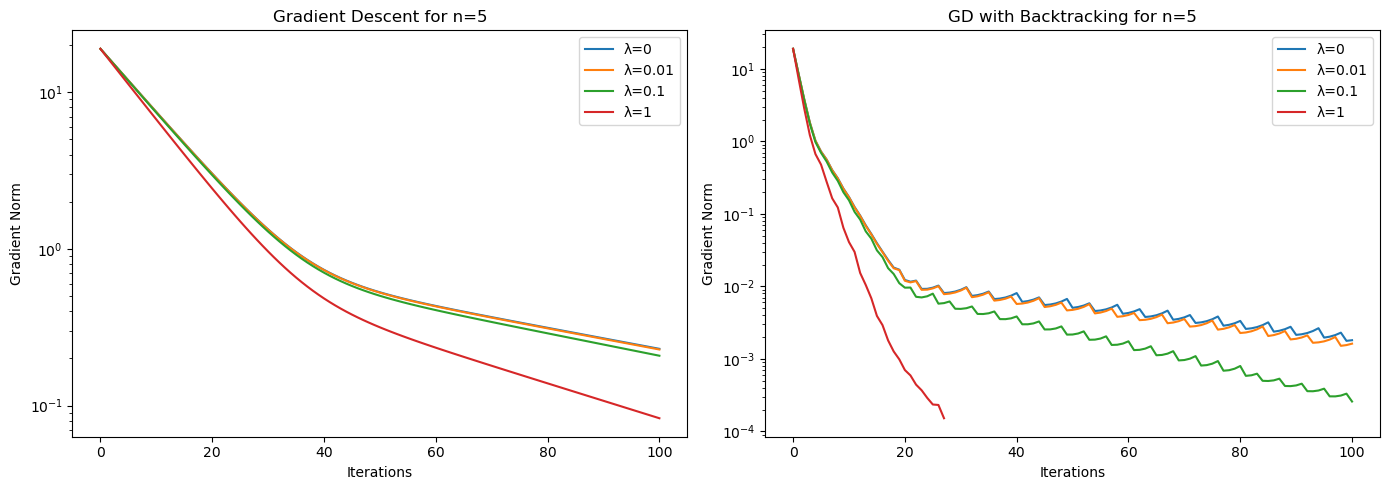

Standard Gradient Descent:
Last x value: [0.95698506 1.07659429 1.07279626 1.04873318 1.02114135 0.99470322
 0.97074569 0.9495058  0.93084711 0.91451521]
Number of iterations: 100
Last function value: 0.007557658096677542
Last gradient norm: 0.09904729342724322
Standard Gradient Descent:
Last x value: [0.95772561 1.07638308 1.0721815  1.04790739 1.02019415 0.99368193
 0.96967739 0.94840686 0.92972785 0.91338234]
Number of iterations: 100
Last function value: 0.05721152669395237
Last gradient norm: 0.09804585575077908
Standard Gradient Descent:
Last x value: [0.96416982 1.0744134  1.0666733  1.04055509 1.01178393 0.98462789
 0.96021604 0.93868107 0.91982745 0.90336554]
Number of iterations: 100
Last function value: 0.5007922887521102
Last gradient norm: 0.08947260693790599
Standard Gradient Descent:
Last x value: [1.01025582 1.04959747 1.01414362 0.97405048 0.93749094 0.90573431
 0.8785086  0.85521928 0.83526492 0.81811691]
Number of iterations: 100
Last function value: 4.64435401046498

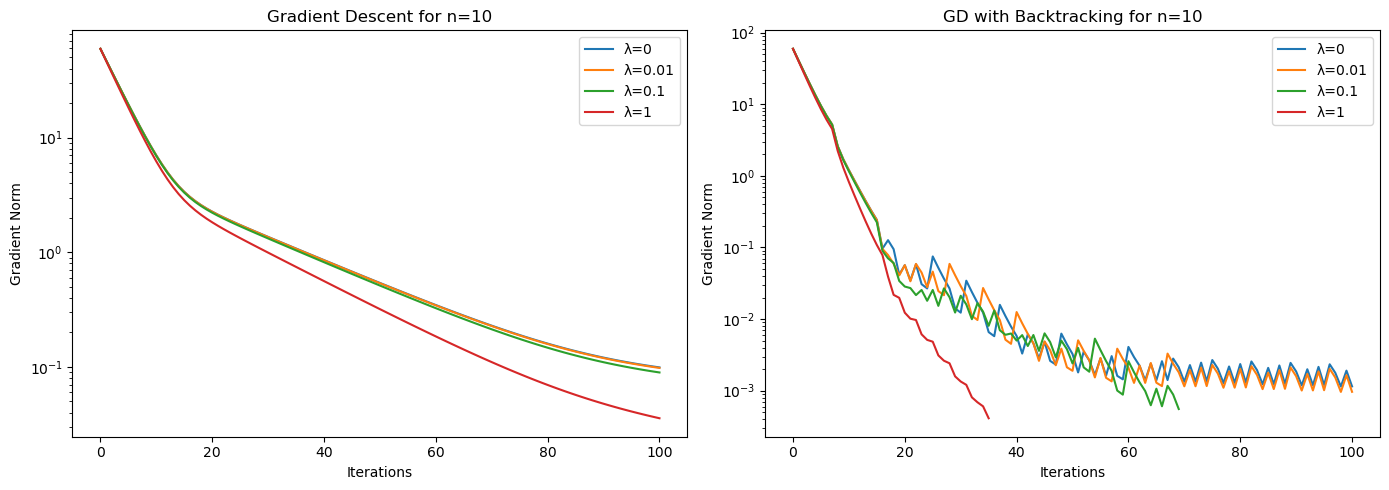

Standard Gradient Descent:
Last x value: [0.95972396 1.0230104  1.05018763 1.05472614 1.04860345 1.0375174
 1.02429483 1.01039344 0.99657981 0.98325481 0.97061892 0.9587603
 0.94770352 0.93743727 0.9279305 ]
Number of iterations: 100
Last function value: 0.011311515249849953
Last gradient norm: 0.1581359160816315
Standard Gradient Descent:
Last x value: [0.96002718 1.02337689 1.05024765 1.05454168 1.04823867 1.03701951
 1.02369728 1.00972004 0.99584782 0.98247694 0.9698047  0.95791698
 0.94683668 0.93655125 0.92702874]
Number of iterations: 100
Last function value: 0.0859108433948294
Last gradient norm: 0.15654427685671207
Standard Gradient Descent:
Last x value: [0.96274535 1.02651574 1.05067657 1.05282301 1.04494037 1.03255726
 1.0183646  1.00372578 0.98934304 0.97557285 0.96258455 0.95044401
 0.93915957 0.92870795 0.91904911]
Number of iterations: 100
Last function value: 0.7539415640088055
Last gradient norm: 0.1429148219397938
Standard Gradient Descent:
Last x value: [0.98807652 1

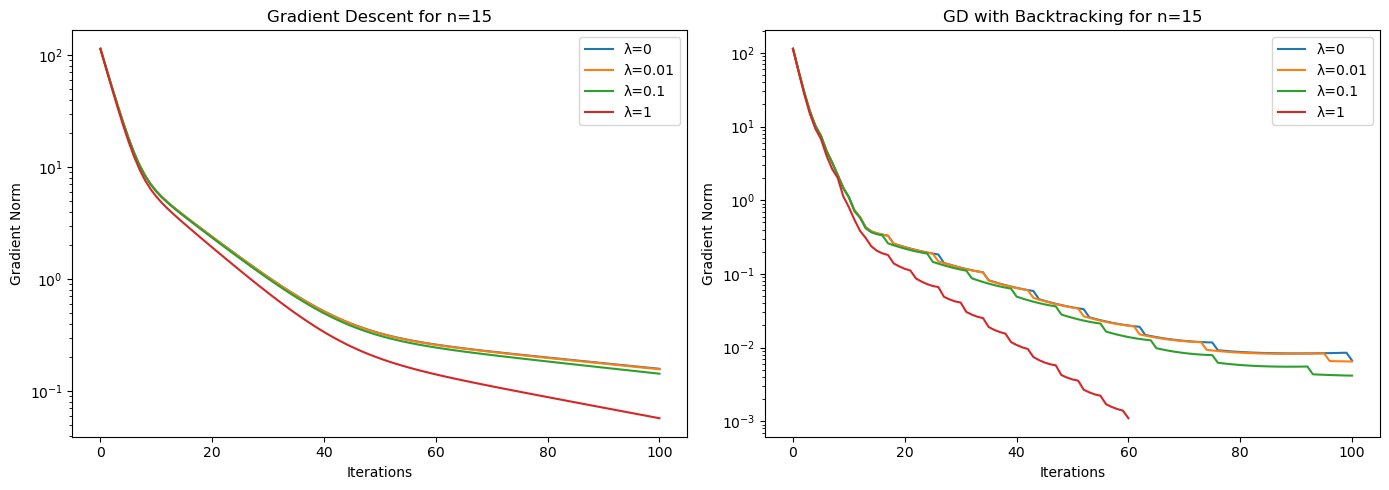

Standard Gradient Descent:
Last x value: [0.98568006 0.9775954  1.01033576 1.03006468 1.03900947 1.04089505
 1.03834756 1.03306556 1.02613951 1.01827501 1.00993285 1.00141576
 0.99292282 0.98458411 0.97648316 0.96867191 0.96118059 0.95402457
 0.94720896 0.94073193]
Number of iterations: 100
Last function value: 0.007724239631672158
Last gradient norm: 0.1583540823879557
Standard Gradient Descent:
Last x value: [0.98561729 0.97815904 1.0107415  1.03026256 1.03902447 1.04075957
 1.03808987 1.03270849 1.02570112 1.01776958 1.00937173 1.00080803
 0.99227583 0.98390381 0.97577445 0.96793884 0.96042651 0.9532523
 0.94642087 0.93993001]
Number of iterations: 100
Last function value: 0.10742600813628601
Last gradient norm: 0.15674765311077102
Standard Gradient Descent:
Last x value: [0.98514476 0.98306748 1.01423488 1.03192238 1.03907668 1.03949142
 1.03575081 1.0294993  1.02178048 1.01326281 1.00437833 0.99540762
 0.98653264 0.97787009 0.96949302 0.96144503 0.95374974 0.94641713
 0.93944801 0

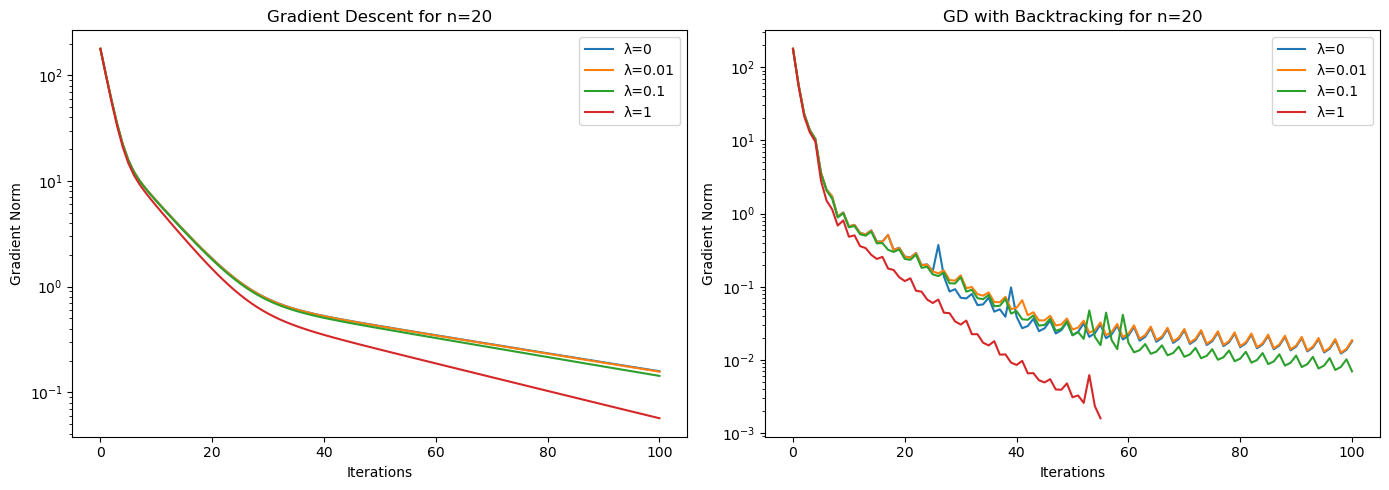

Standard Gradient Descent:
Last x value: [1.00658798 0.95588594 0.98202068 1.00555476 1.02132764 1.03057106
 1.03500069 1.03599989 1.03458456 1.03148465 1.02722355 1.02217808
 1.01662103 1.01075086 1.00471243 0.99861165 0.99252581 0.98651106
 0.98060786 0.97484488 0.96924193 0.96381218 0.95856378 0.95350106
 0.94862551]
Number of iterations: 100
Last function value: 0.005241793547984446
Last gradient norm: 0.11748769504920482
Standard Gradient Descent:
Last x value: [1.00634808 0.95640998 0.98252486 1.00592571 1.02155396 1.03066481
 1.03497857 1.03587803 1.03437722 1.03120396 1.02687975 1.02177977
 1.01617544 1.01026408 1.00418964 0.99805723 0.99194351 0.98590411
 0.97997903 0.97419656 0.96857621 0.96313088 0.95786848 0.95279316
 0.94790624]
Number of iterations: 100
Last function value: 0.12999466246282723
Last gradient norm: 0.11628911829051893
Standard Gradient Descent:
Last x value: [1.0043058  0.96100837 0.98691807 1.00913394 1.02348463 1.03142752
 1.03472204 1.03474532 1.03249405

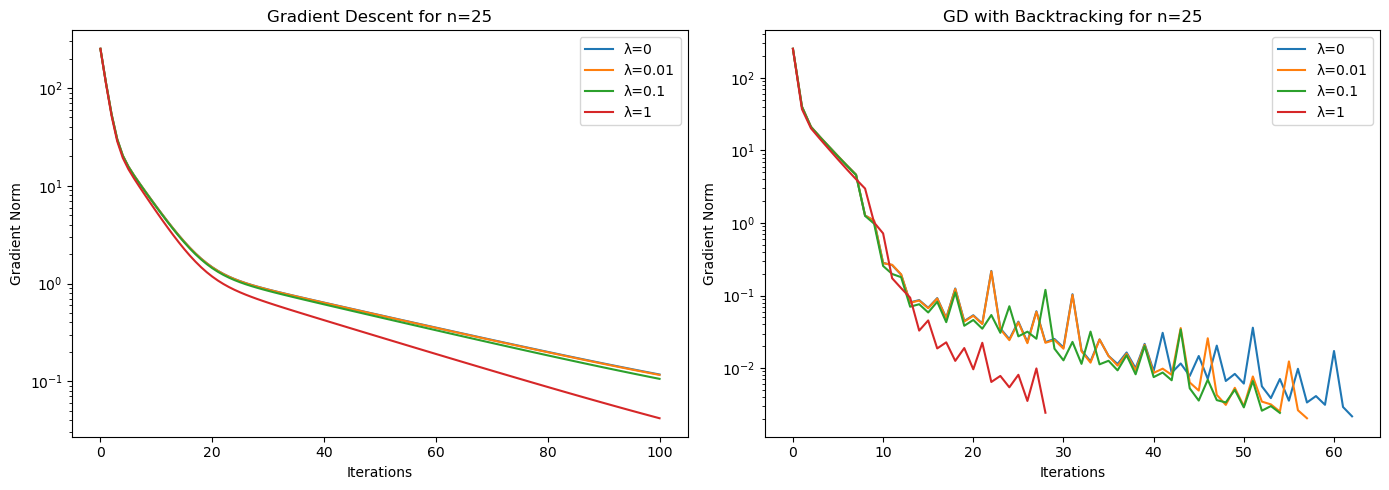

In [8]:
# 1.3.4
# I fix the step_size to 0.01, as it is the best performing one and in this case the main focus is on changing the lambda value
alpha = 0.01

for n in [5, 10, 15, 20, 25]:
    gradients = []
    x_true = np.ones(n)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    lambdas = [0, 0.01, 0.1, 1]
    for idx, lambda_ in enumerate(lambdas):
        v = np.linspace(0, 1, n)
        A = np.vander(v, increasing=True)

        b = A @ x_true

        f = lambda x: 0.5 * np.linalg.norm(A @ x - b)**2 + (lambda_ / 2) * np.linalg.norm(x)**2
        grad_f = lambda x: A.T @ (A @ x - b) + lambda_ * x

        x0 = np.zeros(n)

        x_vals, k, f_vals, grad_norms = gradient_descent(f, grad_f, x0, alpha, maxit, tolf, tolx)
        print("Standard Gradient Descent:")
        print("Last x value:", x_vals[-1])
        print("Number of iterations:", k)
        print("Last function value:", f_vals[-1])
        print("Last gradient norm:", grad_norms[-1])
                
        gradients.append(grad_norms)

        x_vals_bt, k_bt, f_vals_bt, grad_norms_bt = gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx)
        
        gradients.append(grad_norms_bt)
        
    print("\nGradient Descent with Backtracking:")
    print("Last x value:", x_vals_bt[-1])
    print("Number of iterations:", k_bt)
    print("Last function value:", f_vals_bt[-1])
    print("Last gradient norm:", grad_norms_bt[-1])
    
    for i, lambda_ in enumerate(lambdas):
        axes[0].plot(gradients[i*2], label=f"λ={lambda_}")
        axes[0].set_title(f"Gradient Descent for n={n}")
        axes[0].set_xlabel("Iterations")
        axes[0].set_ylabel("Gradient Norm")
        axes[0].set_yscale("log")
        axes[0].legend()
    
    for i, lambda_ in enumerate(lambdas):
        axes[1].plot(gradients[i*2+1], label=f"λ={lambda_}")
        axes[1].set_title(f"GD with Backtracking for n={n}")
        axes[1].set_xlabel("Iterations")
        axes[1].set_ylabel("Gradient Norm")
        axes[1].set_yscale("log")
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    #plot_gradient_norms(gradients[0], gradients[1], gradients[2], grad_norms_bt, f"Gradient Norms Over Time for n={n}", label001="GD lr=0.1 lambda=0.01", label01="GD lr=0.1 lambda=0.1", label05="GD lr=0.1 lambda=1", label_backtracking="Gradient backtracking")
    

From the results of this experiment, we observe that applying stronger regularization leads to a faster reduction in the gradient norm, this is because regularization improves the conditioning of the optimization problem, making the descent more stable and efficient


Initial point: [0]
Standard Gradient Descent:
learning_rate: 0.01
Last x value: [0.9221562]
Number of iterations: 95
Last function value: -2.037748013878484
Last gradient norm: 0.000805200967020081
Standard Gradient Descent:
learning_rate: 0.1
Last x value: [0.9222264]
Number of iterations: 10
Last function value: -2.037748041480788
Last gradient norm: 1.882708770395425e-05
Standard Gradient Descent:
learning_rate: 0.5
Last x value: [nan]
Number of iterations: 100
Last function value: nan
Last gradient norm: nan

Gradient Descent with Backtracking:
Last x value: [0.92222347]
Number of iterations: 12
Last function value: -2.0377480414856457
Last gradient norm: 1.550486155821318e-05


C:\Users\giaco\AppData\Local\Temp\ipykernel_17332\3482485017.py:37: RuntimeWarning: overflow encountered in scalar power
  f = lambda x: x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0]
C:\Users\giaco\AppData\Local\Temp\ipykernel_17332\3482485017.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  f = lambda x: x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0]
C:\Users\giaco\AppData\Local\Temp\ipykernel_17332\3482485017.py:38: RuntimeWarning: overflow encountered in scalar power
  grad_f = lambda x: np.array([4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2])
C:\Users\giaco\AppData\Local\Temp\ipykernel_17332\3482485017.py:37: RuntimeWarning: invalid value encountered in scalar add
  f = lambda x: x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0]
C:\Users\giaco\AppData\Local\Temp\ipykernel_17332\3482485017.py:38: RuntimeWarning: invalid value encountered in scalar add
  grad_f = lambda x: np.array([4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2])


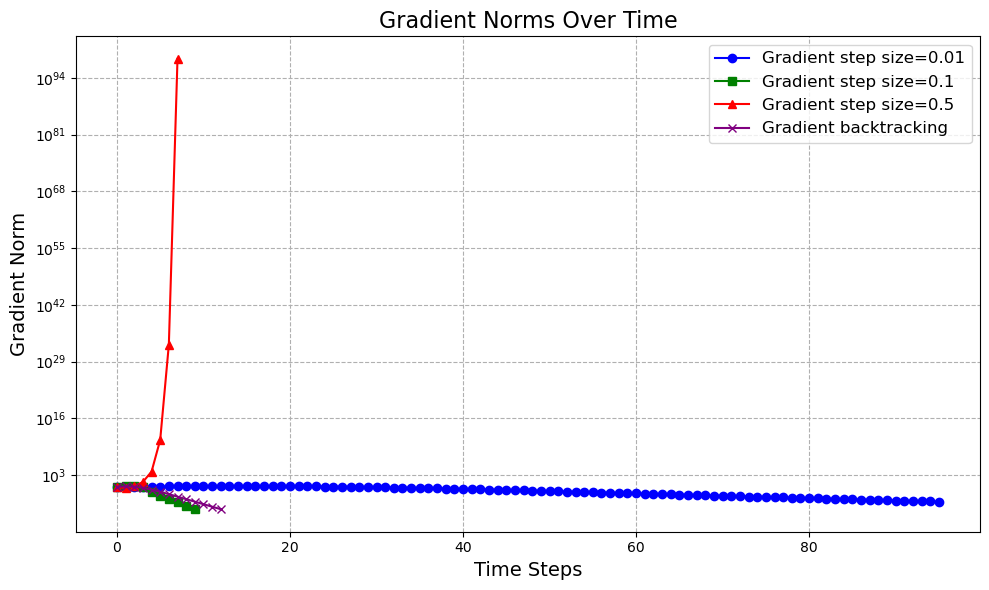

[4.0, 3.8888000579616833, 3.7796347568282993, 3.672482611699599, 3.5673222367697086, 3.4641323453271387, 3.3628917497547723, 3.2635793615298843, 3.1661741912241173, 3.0706553485035046, 2.977002042128448, 2.885193579953741, 2.7952093689285498, 2.70702891509642, 2.620631823595286, 2.5359977986574473, 2.4531066436095945, 2.371938260872796, 2.2924726519624987, 2.2146899174885317, 2.1385702571551, 2.0640939697607936, 1.9912414531985791, 1.919993204455802, 1.8503298196141924, 1.7822319938498548, 1.7156805214332773, 1.6506562957293274, 1.587140309197252, 1.525113653390679, 1.4645575189576125, 1.4054531956404426, 1.3477820722759337, 1.291525636795234, 1.23666547622387, 1.1831832766817478, 1.1310608233831552, 1.0802800006367548, 1.0308227918455968, 0.982671279507108, 0.9358076452130923, 0.8902141696497372, 0.8458732325976079, 0.8027673129316524, 0.7608789886211964, 0.7201909367299448, 0.6806859334159849, 0.642346853931782, 0.6051566726241813, 0.5690984629344094, 0.5341553973980737, 0.5003107476

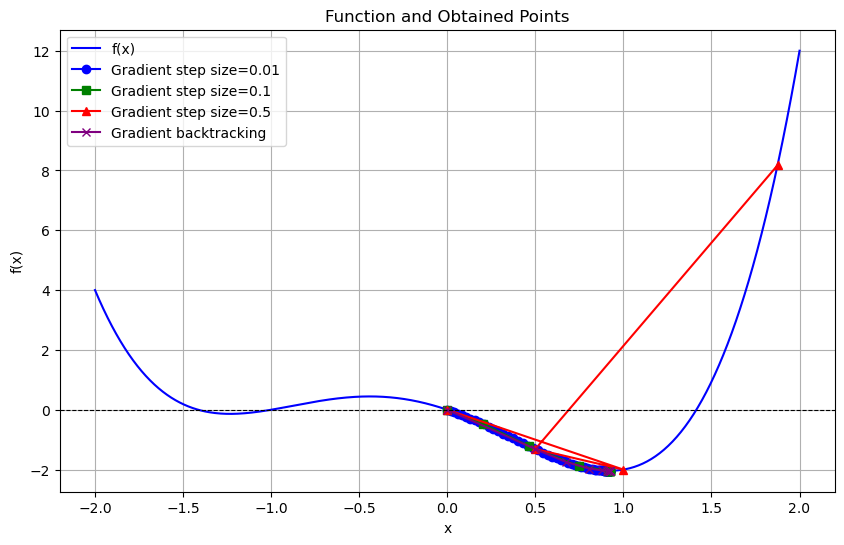


Initial point: [-0.5]
Standard Gradient Descent:
learning_rate: 0.01
Last x value: [-1.19767959]
Number of iterations: 100
Last function value: -0.13390103453725644
Last gradient norm: 0.22204674409191139
Standard Gradient Descent:
learning_rate: 0.1
Last x value: [-1.23223566]
Number of iterations: 18
Last function value: -0.13781766892508251
Last gradient norm: 2.7017287666630807e-05
Standard Gradient Descent:
learning_rate: 0.5
Last x value: [nan]
Number of iterations: 100
Last function value: nan
Last gradient norm: nan

Gradient Descent with Backtracking:
Last x value: [-1.23225179]
Number of iterations: 16
Last function value: -0.13781766847315824
Last gradient norm: 8.307343615854279e-05


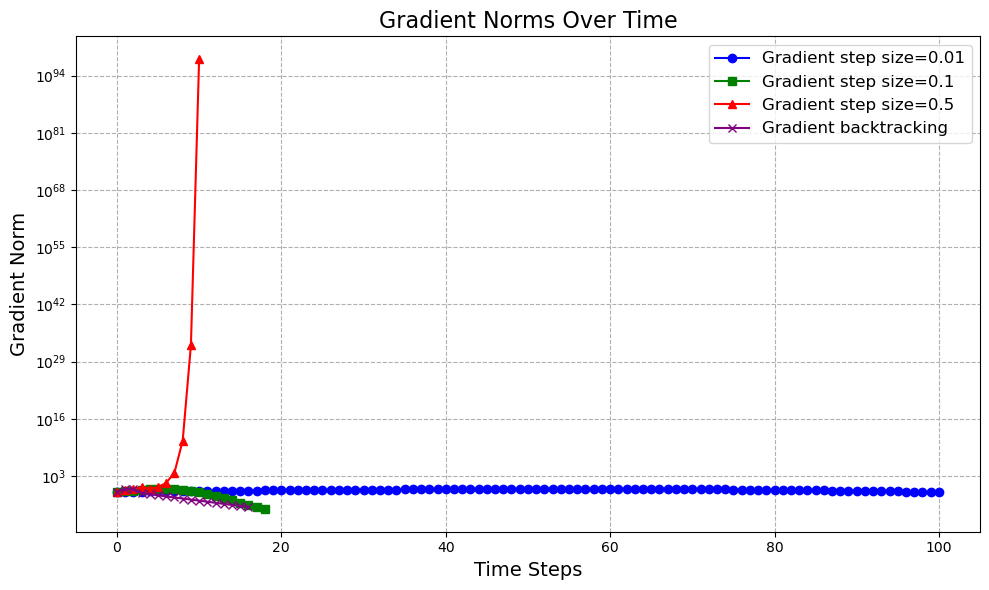

[4.0, 3.8888000579616833, 3.7796347568282993, 3.672482611699599, 3.5673222367697086, 3.4641323453271387, 3.3628917497547723, 3.2635793615298843, 3.1661741912241173, 3.0706553485035046, 2.977002042128448, 2.885193579953741, 2.7952093689285498, 2.70702891509642, 2.620631823595286, 2.5359977986574473, 2.4531066436095945, 2.371938260872796, 2.2924726519624987, 2.2146899174885317, 2.1385702571551, 2.0640939697607936, 1.9912414531985791, 1.919993204455802, 1.8503298196141924, 1.7822319938498548, 1.7156805214332773, 1.6506562957293274, 1.587140309197252, 1.525113653390679, 1.4645575189576125, 1.4054531956404426, 1.3477820722759337, 1.291525636795234, 1.23666547622387, 1.1831832766817478, 1.1310608233831552, 1.0802800006367548, 1.0308227918455968, 0.982671279507108, 0.9358076452130923, 0.8902141696497372, 0.8458732325976079, 0.8027673129316524, 0.7608789886211964, 0.7201909367299448, 0.6806859334159849, 0.642346853931782, 0.6051566726241813, 0.5690984629344094, 0.5341553973980737, 0.5003107476

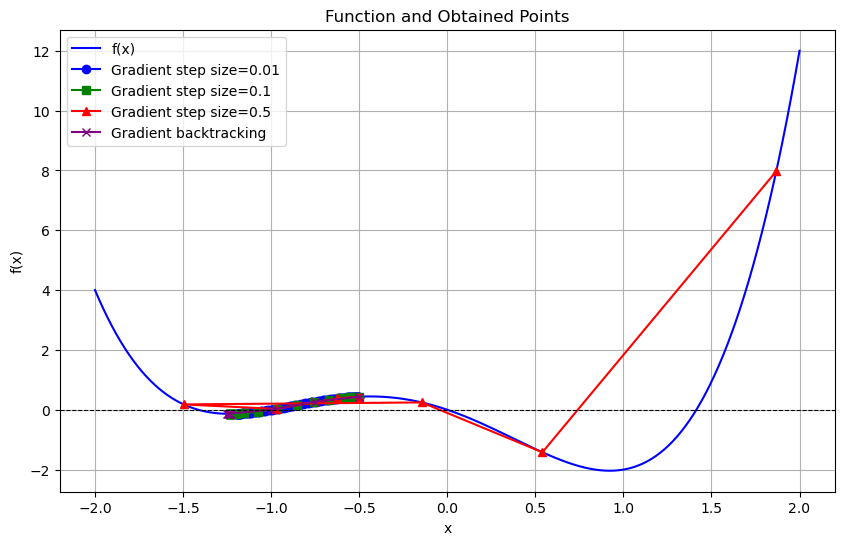

In [9]:
# 1.3.5
def evaluate_and_plot(f, x_001, x_01, x_05, x_backtracking):
    # 1.7 This should be [-3,3], but the function rise esponentially and then the steps wouldnt be noticeable
    x_vals = np.linspace(-2, 2, 500)
    y_vals = [f(np.array([x])) for x in x_vals]
    print(y_vals)
    
    x_001 = [x for x in x_001 if x >= -2 and x <= 2]
    x_01 = [x for x in x_01 if x >= -2 and x <= 2]
    x_05 = [x for x in x_05 if x >= -2 and x <= 2]
    x_backtracking = [x for x in x_backtracking if x >= -2 and x <= 2]
    
    y_vals_001 = [f(np.array([x])) for x in x_001]
    y_vals_01 = [f(np.array([x])) for x in x_01]
    y_vals_05 = [f(np.array([x])) for x in x_05]
    y_vals_backtracking = [f(np.array([x])) for x in x_backtracking]

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="f(x)", color="blue")
        
    # Plot each kind of point with a unique marker and label
    plt.plot(x_001, y_vals_001, label="Gradient step size=0.01", marker='o', color='blue')
    plt.plot(x_01, y_vals_01, label="Gradient step size=0.1", marker='s', color='green')
    plt.plot(x_05, y_vals_05, label="Gradient step size=0.5", marker='^', color='red')
    plt.plot(x_backtracking, y_vals_backtracking, label="Gradient backtracking", marker='x', color='purple')

    # Add labels and legend
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Function and Obtained Points")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.grid(True)
    plt.legend()
    plt.show()

f = lambda x: x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0]
grad_f = lambda x: np.array([4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2])

for x0 in [[0],[-0.5]]:
    print(f"\nInitial point: {x0}")
    x0 = np.array(x0)
    
    gradients = []
    xes_vals = []

    for alpha in [0.01, 0.1, 0.5]:
        x_vals, k, f_vals, grad_norms = gradient_descent(f, grad_f, x0, alpha, maxit, tolf, tolx)
        print("Standard Gradient Descent:")
        print("learning_rate:", alpha)
        print("Last x value:", x_vals[-1])
        print("Number of iterations:", k)
        print("Last function value:", f_vals[-1])
        print("Last gradient norm:", grad_norms[-1])
        
        gradients.append(grad_norms)
        xes_vals.append(x_vals)

    x_vals_bt, k_bt, f_vals_bt, grad_norms_bt = gradient_descent_backtracking(f, grad_f, x0, maxit, tolf, tolx)
    print("\nGradient Descent with Backtracking:")
    print("Last x value:", x_vals_bt[-1])
    print("Number of iterations:", k_bt)
    print("Last function value:", f_vals_bt[-1])
    print("Last gradient norm:", grad_norms_bt[-1])

    plot_gradient_norms(gradients[0], gradients[1], gradients[2], grad_norms_bt)
    evaluate_and_plot(f, xes_vals[0], xes_vals[1], xes_vals[2], x_vals_bt)

# Optimization via Stochastic Gradient Descent

In [10]:
data = pd.read_csv('poly_regression_large.csv')

x = data['x'].values
y = data['y'].values

# 1.1 Split the dataset into training and validation sets
np.random.seed(42)
indices = np.random.permutation(x.shape[0])
split = int(0.8 * x.shape[0])
x_train, x_val = x[indices[:split]], x[indices[split:]]
Y_train, Y_val = y[indices[:split]], y[indices[split:]]

# Function to generate polynomial features
def polynomial_features(x, k):
    x_poly = np.zeros((x.shape[0], k))
    for i in range(k):
        x_poly[:, i] = x**i
    return x_poly

def loss(X, Y, theta):
    return np.mean((X@theta - Y)**2)

def g_loss(X, Y, theta):
    return 2/len(Y) * X.T @ (X@theta - Y)

def plot_comparison(weights_sgd, weights_gd, weights_sgdsd, K, weights_true=None):
    x_plot = np.linspace(min(x_train), max(x_train), 500)
    if weights_true:
        y_true = polynomial_features(x_plot, K) @ weights_true
    y_sgd = polynomial_features(x_plot, K) @ weights_sgd
    y_gd = polynomial_features(x_plot, K) @ weights_gd
    y_gdsd = polynomial_features(x_plot, K) @ weights_sgdsd

    # Plotting
    plt.figure(figsize=(8, 6))

    # Scatter plot of the dataset
    plt.scatter(x_train, Y_train, label="Dataset Points", color="black", alpha=0.7)

    # Plot the true function and model predictions
    if weights_true:
        plt.plot(x_plot, y_true, label="True Function", color="green", linewidth=2, linestyle="--")
    plt.plot(x_plot, y_sgd, label="SGD Model", color="blue", linewidth=2)
    plt.plot(x_plot, y_gd, label="GD Model", color="red", linewidth=2)
    plt.plot(x_plot, y_gdsd, label="SGD on Small Dataset", color="orange", linewidth=2)

    # Labels, legend, and grid
    plt.title(f"Dataset and Model Predictions (K={K})", fontsize=16)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

K = 3

In the stochastic version of gradient descent, our goal is to build a model that best fits the data, unlike the standard gradient descent, the dataset is divided into smaller subsets called batches, and the final gradient is computed as the sum of the gradients calculated from each batch. Additionally, a loss function is used to evaluate how closely the model's predictions match the actual data, a common loss function is the mean squared error (MSE), The parameters $\theta$ of the function we aim to optimize are calculated as follows:
$$\theta^* = \argmin_{\theta}\sum_{i=1}^N l_i(\theta;x^i,y^i)$$

In [11]:
def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling
    
    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(X_batch, y_batch, theta)
            
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(X, y, theta)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

learning_rate = 0.01
epochs = 1000
batch_size = 10

theta0 = np.ones(K)
D = (polynomial_features(x_train, K), Y_train)
theta_history_SGD, loss_history_SGD, grad_norm_history_SGD = SGD(loss, g_loss, D, theta0, learning_rate, batch_size, epochs)

In [12]:
def GD(loss, grad_loss, D, theta0, max_iterations, tolf, tolx):
    X, y = D
    d = theta0.shape[0]
    
    theta_history = []
    loss_history = []
    grad_norm_history = []
    
    theta = theta0    
    initial_grad_norm = np.linalg.norm(grad_loss(X, y, theta))
    
    for it in range(max_iterations):
        grad = grad_loss(X, y, theta)
        
        if np.linalg.norm(grad) < tolf * initial_grad_norm:
            break
        
        t = 1
        tau = 0.25
        c = 0.5
        while loss(X, y, theta - t * grad) > loss(X, y, theta) - c * t * np.linalg.norm(grad)**2:
            t *= tau

        theta_new = theta - t * grad
        
        if np.linalg.norm(theta_new - theta) < tolx:
            theta = theta_new
            theta_history.append(theta)
            loss_history.append(loss(X, y, theta))
            grad_norm_history.append(np.linalg.norm(grad))
            break

        theta = theta_new
        theta_history.append(theta)
        loss_history.append(loss(X, y, theta))
        grad_norm_history.append(np.linalg.norm(grad))
    
    return np.array(theta_history), np.array(loss_history), np.array(grad_norm_history)

# Training parameters
theta0 = np.ones(K)
D = (polynomial_features(x_train, K), Y_train)
max_iterations = 1000
tolf = 1e-6
tolx = 1e-6

theta_history_GD, loss_history_GD, grad_norm_history_GD = GD(loss, g_loss, D, theta0, max_iterations, tolf, tolx)

In [13]:
# 1.5 Train and evaluate on the small dataset
data_small = pd.read_csv('poly_regression_small.csv')

x_small = data_small['x'].values
y_small = data_small['y'].values

theta0 = np.ones(K)
D_small = (polynomial_features(x_small, K), y_small)
theta_history_small, loss_history_small, grad_norm_history_small = SGD(loss, g_loss, D_small, theta0, learning_rate, batch_size, epochs)

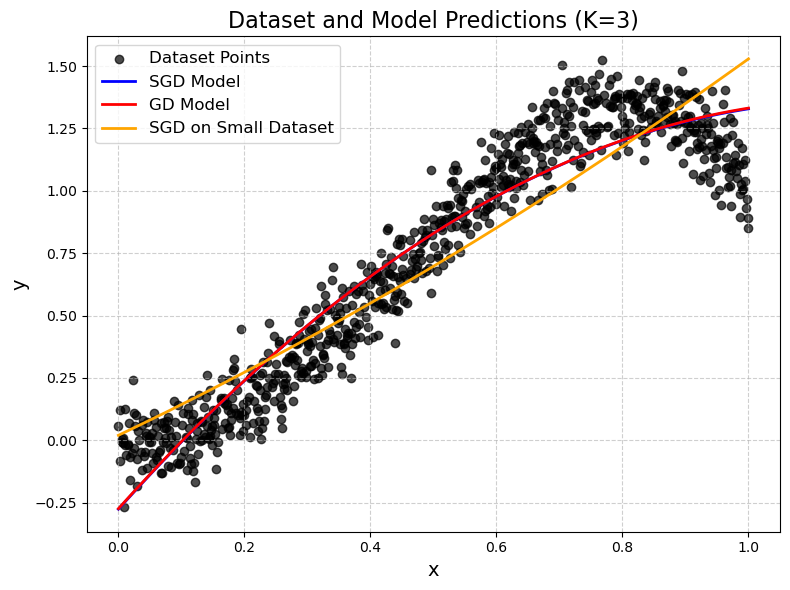

MSE on the large dataset:
SGD: 0.021431079861213797
GD: 0.02139774374357167
GDS on small dataset: 0.03451205186192577


In [14]:
# 1.6 Compute the MSE on the large dataset
plot_comparison(theta_history_SGD[-1], theta_history_GD[-1], theta_history_small[-1], K)

y_pred_sgd = polynomial_features(x_val, K) @ theta_history_SGD[-1]
mse_sgd = np.mean((y_pred_sgd - Y_val)**2)

y_pred_gd = polynomial_features(x_val, K) @ theta_history_GD[-1]
mse_gd = np.mean((y_pred_gd - Y_val)**2)

y_pred_gdsd = polynomial_features(x_val, K) @ theta_history_small[-1]
mse_gdsd = np.mean((y_pred_gdsd - Y_val)**2)

print("MSE on the large dataset:")
print(f"SGD: {mse_sgd}")
print(f"GD: {mse_gd}")
print(f"GDS on small dataset: {mse_gdsd}")

From the results, we observe that with K=3, SGD consistently outperforms GD, even when compared to the version trained on the smaller dataset, this suggests that the stochastic approach in SGD not only accelerates convergence but also generalizes better under certain conditions, making it more robust for smaller subsets of data

In [15]:
# 1.7 Repeat the experiments with different K values
K_values = [2, 5, 7]

for K in K_values:
    print(f"\nTraining with Stochastic Gradient Descent (K={K}):")
    
    # Update theta0 and polynomial features to match the current K
    theta0 = np.ones(K)
    D = (polynomial_features(x_train, K), Y_train)
    
    theta_history_SGD, loss_history_SGD, grad_norm_history_SGD = SGD(loss, g_loss, D, theta0, learning_rate, batch_size, epochs)
    weights_sgd = theta_history_SGD[-1]

    print(f"Training with Normal Gradient Descent (K={K}):")
    theta_history_GD, loss_history_GD, grad_norm_history_GD = GD(loss, g_loss, D, theta0, max_iterations, tolf, tolx)
    weights_gd = theta_history_GD[-1]
    
    # Assuming D_small is defined for a smaller subset of the training data
    print(f"Training with Gradient Descent on the small dataset (K={K}):")
    D_small = (polynomial_features(x_train[:100], K), Y_train[:100])  # Example for smaller dataset
    theta_history_small, loss_history_small, grad_norm_history_small = SGD(loss, g_loss, D_small, theta0, learning_rate, batch_size, epochs)
    weights_sgdsd = theta_history_small[-1]

    # Validate predictions and compute MSE
    y_pred_sgd = polynomial_features(x_val, K) @ weights_sgd
    mse_sgd = np.mean((y_pred_sgd - Y_val)**2)

    y_pred_gd = polynomial_features(x_val, K) @ weights_gd
    mse_gd = np.mean((y_pred_gd - Y_val)**2)

    y_pred_gdsd = polynomial_features(x_val, K) @ weights_sgdsd
    mse_gdsd = np.mean((y_pred_gdsd - Y_val)**2)

    print(f"MSE for Stochastic GD (K={K}): {mse_sgd}")
    print(f"MSE for Normal GD (K={K}): {mse_gd}")
    print(f"MSE for Stochastic GD on small dataset (K={K}): {mse_gdsd}")


Training with Stochastic Gradient Descent (K=2):
Training with Normal Gradient Descent (K=2):
Training with Gradient Descent on the small dataset (K=2):
MSE for Stochastic GD (K=2): 0.028309290818238343
MSE for Normal GD (K=2): 0.02825140893956262
MSE for Stochastic GD on small dataset (K=2): 0.028455083351179772

Training with Stochastic Gradient Descent (K=5):
Training with Normal Gradient Descent (K=5):
Training with Gradient Descent on the small dataset (K=5):
MSE for Stochastic GD (K=5): 0.011512101643174235
MSE for Normal GD (K=5): 0.011631099578660693
MSE for Stochastic GD on small dataset (K=5): 0.015261000859464904

Training with Stochastic Gradient Descent (K=7):
Training with Normal Gradient Descent (K=7):
Training with Gradient Descent on the small dataset (K=7):
MSE for Stochastic GD (K=7): 0.00975271410807191
MSE for Normal GD (K=7): 0.009785641122808717
MSE for Stochastic GD on small dataset (K=7): 0.010805963167291181


True weights: [ 0  0  4  0 -3]
SGD Weight: [-0.1531554   1.35025886  1.68953507  0.01290607 -1.79686937], norm difference: 2.9381275701945113
GD Weight: [-0.15537876  1.3857089   1.63741235 -0.00453325 -1.75219992], norm difference: 3.0138310719786126
SGD Small Weight: [-0.05969471  1.44026696  0.65888785 -0.10025369 -0.63863926], norm difference: 4.339013493731267


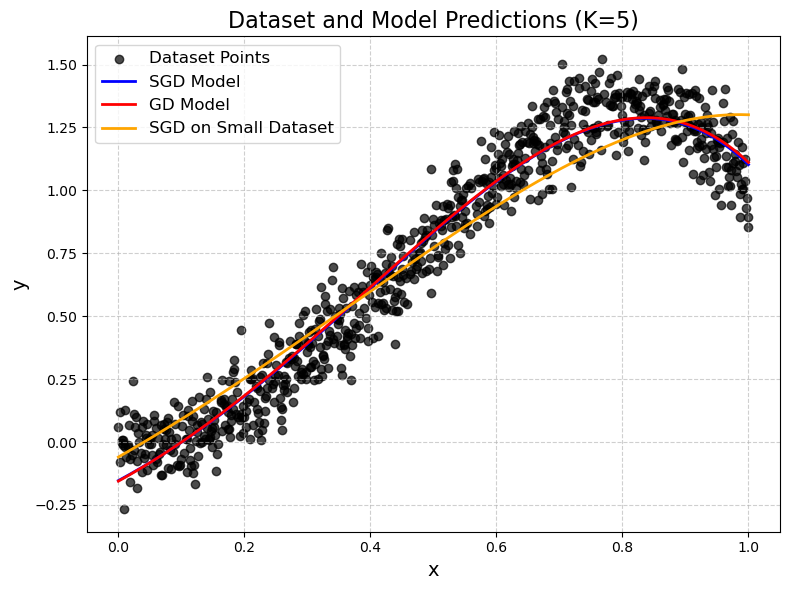

In [16]:
# 1.8 Visualization: Dataset Points and Model Predictions for K=5
K = 5
weights_true = np.array([0, 0, 4, 0, -3])

D = (polynomial_features(x_train, K), Y_train)
D_small = (polynomial_features(x_small, K), y_small)
theta0 = np.ones(K)

theta_history_SGD, loss_history_SGD, grad_norm_history_SGD = SGD(loss, g_loss, D, theta0, learning_rate, batch_size, epochs)
theta_history_GD, loss_history_GD, grad_norm_history_GD = GD(loss, g_loss, D, theta0, max_iterations, tolf, tolx)
theta_history_small, loss_history_small, grad_norm_history_small = SGD(loss, g_loss, D_small, theta0, learning_rate, batch_size, epochs)

print("True weights:", weights_true)
print(f"SGD Weight: {theta_history_SGD[-1]}, norm difference: {np.linalg.norm(theta_history_SGD[-1] - weights_true)}")
print(f"GD Weight: {theta_history_GD[-1]}, norm difference: {np.linalg.norm(theta_history_GD[-1] - weights_true)}")
print(f"SGD Small Weight: {theta_history_small[-1]}, norm difference: {np.linalg.norm(theta_history_small[-1] - weights_true)}")

plot_comparison(theta_history_SGD[-1], theta_history_GD[-1], theta_history_small[-1], K)